## PRML 1.1 Polynomial Curve Fitting

###Overview
Plot a traning data set of $N$ = 10 points, shown as blue circles, each comparising an observation of the input variable $x$  along with the corresponding target variable $t$. The green curve shows the funcsion $sin(2\pi x)$ used to generate the data.
To predict the value of $t$ for some new value of $x$, polynominal curve having arious orders $M$ is shown as red curves in the figure 1.4.

On the other hand, the figure 1.6 shows the increasing the size of data set reduce the "over-fitting" problem.

###Procedure

① Implement the formula (1.1)
\begin{equation*}
 y(x, {\bf w}) = w_0 + w_1 x + w_1 x^2 + ...+ w_M x^M = \sum_{j=1}^M w_j x^M (1.1)
\end{equation*}
where  $M$ is oder of polynominal. 

②To obtain parameter $w$, sum of the sequares of the errors between predictions and each data points $x_n$. 

\begin{equation*}
E({\bf w}) = \frac{1}{2}  \sum_{n=1}^N \{{y({x_n, \bf x_n}) -t_n}^2 \}(1.2)
\end{equation*}

③Simultaneous equations ((1.122) and (1.123)) is solved to minimize (1.2).

\begin{equation*}
\sum_{j=0}^M {\bf A}_{ij} w_j = {\bf T}_i(1.122)
\end{equation*}

\begin{equation*}
{\bf A}_i = \sum_{n=1}^N (x_n)^{i+j} (1.123)
\end{equation*}

\begin{equation*}
{\bf T}_i = \sum_{n=1}^N (x_n)^i t_n (1.123)
\end{equation*}

###Code

In [1]:
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#(1.1)
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in xrange(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()
        
    T = np.array([((x**i)*t).sum() for i in xrange(M+1)])
    return  np.linalg.solve(A, T)

[ 0.05182588]
[ 1.09378607 -2.31546708]
[  0.06894089  11.26512436 -33.24422945  21.6700465 ]
[ -2.06044002e-03   1.01530036e+02  -1.96427870e+03   1.57023760e+04
  -6.41811148e+04   1.45645156e+05  -1.85339825e+05   1.22731430e+05
  -3.15186212e+04  -1.23477436e+03]


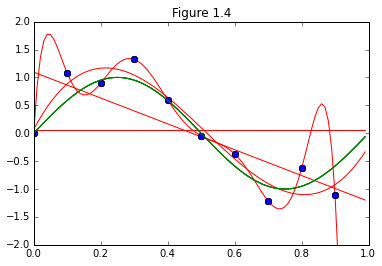

In [3]:
if __name__ == "__main__":
    #Sine curve
    x_real = np.arange(0, 1, 0.01)
    y_real = np.sin(2*np.pi*x_real)
    
    ##Training Data
    N=10
    x_train = np.arange(0, 1, 0.1)
    
    #Set "small level of random noise having a Gaussian distribution"
    loc = 0
    scale = 0.3
    y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)
    
    for M in [0,1,3,9]:
        W = E(x_train, y_train, M)
        print W
    
        y_estimate = [y(x, W, M) for x in x_real]
    

        plt.plot(x_real, y_estimate, 'r-')
        plt.plot(x_train, y_train, 'bo') 
        plt.plot(x_real, y_real, 'g-')
        xlim(0.0, 1.0)
        ylim(-2, 2)
        title("Figure 1.4")

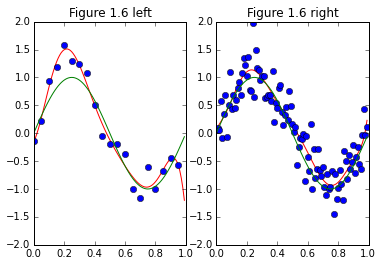

In [4]:
if __name__ == "__main__":
    M2 = 9

    N2 = 20
    x_train2 = np.arange(0, 1, 0.05)
    y_train2 =  np.sin(2*np.pi*x_train2) + np.random.normal(loc,scale,N2)

    N3 = 100
    x_train3 = np.arange(0,1, 0.01)
    y_train3 =  np.sin(2*np.pi*x_train3) + np.random.normal(loc,scale,N3)


    W2 = E(x_train2, y_train2, M2)
    W3 = E(x_train3, y_train3, M2)
    
    y_estimate2 = [y(x, W2, M2) for x in x_real]
    y_estimate3 = [y(x, W3, M2) for x in x_real]

    plt.subplot(1, 2, 1)
    plt.plot(x_real, y_estimate2, 'r-')
    plt.plot(x_train2, y_train2, 'bo') 
    plt.plot(x_real, y_real, 'g-')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Figure 1.6 left")

    plt.subplot(1, 2, 2)
    plt.plot(x_real, y_estimate3, 'r-')
    plt.plot(x_train3, y_train3, 'bo') 
    plt.plot(x_real, y_real, 'g-')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Figure 1.6 right")

###References

Christopher Bishop. (2007). Pattern Recognition and Machine Learning (Information Science and Statistics). Springer